In [49]:
import matlab.engine
eng = matlab.engine.start_matlab()
import matplotlib.pyplot as plt
import os
import cv2
import math as mt
import numpy as np

In [50]:
#path to the diffraction images collected in pump and probe fashion

main_path = r'D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_4us'
folder_name = 'Backup for img#{}'
file_name_probe = 'frame {x} for img#{y} 2020-2-18 11x0.5sec Probe 15000{z:02}fs.spe'
file_name_pp = 'frame {x} for img#{y} 2020-2-18 11x0.5sec Pump+Probe 15000{z:02}fs.spe'

In [51]:
#reading the .spe files corresponding to pump and probe data and storing it as multidimensional array 
probe_data_tmp = []
pp_data_tmp = []
k=0
for i in range(1,6):
    folder_path = os.path.join(main_path,folder_name.format(i))
    
    print('Reading from folder {}'.format(i))
    print(folder_path)
    
    for j in range(1,6):
        #reading images
        probe_file = os.path.join(folder_path,file_name_probe.format(x=j,y=i,z=k))
        print(probe_file)
        pp_file = os.path.join(folder_path,file_name_pp.format(x=j,y=i,z=k))
        print(pp_file)
        #storing the images as numpy arrays 
        probe_data_tmp.append(np.array(eng.ReadsspeIndividual(probe_file),dtype=np.uint16))
        pp_data_tmp.append(np.array(eng.ReadsspeIndividual(pp_file),dtype=np.uint16))
    k=k+1

Reading from folder 1
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_4us\Backup for img#1
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_4us\Backup for img#1\frame 1 for img#1 2020-2-18 11x0.5sec Probe 1500000fs.spe
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_4us\Backup for img#1\frame 1 for img#1 2020-2-18 11x0.5sec Pump+Probe 1500000fs.spe
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_4us\Backup for img#1\frame 2 for img#1 2020-2-18 11x0.5sec Probe 1500000fs.spe
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_4us\Backup for img#1\frame 2 for img#1 2020-2-18 11x0.5sec Pump+Probe 1500000fs.spe
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_4us\Backup for img#1\fram

D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_4us\Backup for img#5\frame 2 for img#5 2020-2-18 11x0.5sec Probe 1500004fs.spe
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_4us\Backup for img#5\frame 2 for img#5 2020-2-18 11x0.5sec Pump+Probe 1500004fs.spe
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_4us\Backup for img#5\frame 3 for img#5 2020-2-18 11x0.5sec Probe 1500004fs.spe
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_4us\Backup for img#5\frame 3 for img#5 2020-2-18 11x0.5sec Pump+Probe 1500004fs.spe
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_4us\Backup for img#5\frame 4 for img#5 2020-2-18 11x0.5sec Probe 1500004fs.spe
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z

In [52]:
np.shape(probe_data_tmp)

(25, 900, 900)

In [53]:
#Clean the data
#in each backup folders there are 5 shots which needs to be averaged and the arked files needs to be removed
median_pp =[]
median_probe=[]
mean_pp = []
mean_probe = []
for i in range(24):
    median_pp.append(np.median(pp_data_tmp[i]))
    median_probe.append(np.median(probe_data_tmp[i]))
    mean_pp.append(np.mean(pp_data_tmp[i]))
    mean_probe.append(np.mean(probe_data_tmp[i]))
print("Pump+probe meadian")
print(median_pp)
print('Probe median')
print(median_probe)
print("Pump+probe mean")
print(mean_pp)
print('Probe mean')
print(mean_probe)

Pump+probe meadian
[360.0, 361.0, 361.0, 361.0, 361.0, 361.0, 361.0, 361.0, 360.0, 360.0, 360.0, 360.0, 361.0, 361.0, 360.0, 360.0, 360.0, 360.0, 360.0, 360.0, 360.0, 360.0, 360.0, 360.0]
Probe median
[354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0]
Pump+probe mean
[369.04937037037035, 370.0083802469136, 369.9608777777778, 369.81563827160494, 369.98583209876546, 369.07645802469136, 369.86953209876543, 369.53694814814816, 368.1061283950617, 367.8033814814815, 367.4928703703704, 368.818012345679, 368.9178259259259, 369.8235913580247, 368.8955049382716, 369.11335185185186, 368.437087654321, 367.72455308641975, 368.55408518518516, 368.97682469135805, 367.83106172839507, 368.5749012345679, 369.23891604938274, 368.4421765432099]
Probe mean
[359.26703333333336, 359.60417160493824, 359.2713135802469, 359.9304024691358, 359.5493950617284, 359.6793901234568, 360.1908888888889, 

In [54]:
std_pp = np.std(median_pp)
avg_pp = np.average(median_pp)
std_prob = np.std(median_probe)
avg_prob = np.average(median_probe)

print('Average pump+probe pixel intensity = {}'.format(avg_pp))
print('Average probe pixel intensity = {}'.format(avg_prob))
print(std_prob)

Average pump+probe pixel intensity = 360.375
Average probe pixel intensity = 354.0
0.0


In [55]:
i=0
deleted_file_pp = []
deleted_file_prob = []

while i<len(pp_data_tmp):
    if np.median(pp_data_tmp[i]) > avg_pp+std_pp:
        deleted_file_pp.append(pp_data_tmp[i])
        pp_data_tmp.pop(i)
        probe_data_tmp.pop(i)
    i=i+1

j=0
i=0
while j<len(probe_data_tmp):
    if np.median(probe_data_tmp[i]) > avg_pp+std_pp:
        deleted_file_prob.append(probe_data_tmp[i])
        probe_data_tmp.pop(i)
        pp_data_tmp.pop(i)
    j=j+1

deleted pp file #5
deleted probe file #0


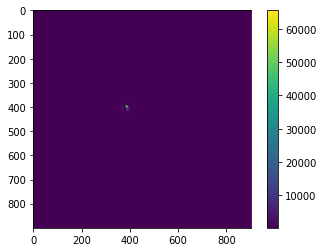

In [56]:
print('deleted pp file #{}'.format(len(deleted_file_pp)))
print('deleted probe file #{}'.format(len(deleted_file_prob)))
np.shape(deleted_file_pp)
plt.imshow(deleted_file_pp[0])
plt.colorbar()

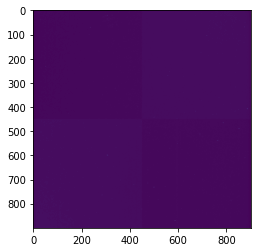

In [57]:
background_file = r'D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\BG\img#1 2020-2-18 11x0.5sec.spe'
bg = np.array(eng.ReadsspeIndividual(background_file),dtype=np.uint16)
plt.imshow(bg)

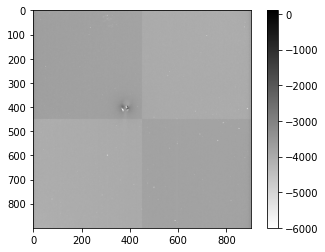

In [58]:
pp_probe = []

sum_pp = np.zeros([900,900])
for i in range(len(pp_data_tmp)):
    sum_pp = sum_pp+pp_data_tmp[i]
    
avg_pp_img = sum_pp/len(pp_data_tmp)

sum_probe = np.zeros([900,900])
for i in range(len(probe_data_tmp)):
    sum_probe = sum_probe+probe_data_tmp[i]
    
avg_pp_img = sum_pp/len(pp_data_tmp)
avg_probe_img = sum_probe/len(probe_data_tmp)

avg_pp_probe = avg_pp_img-avg_probe_img
avg_bg = np.subtract(avg_pp_probe, bg) 

plt.imshow(avg_bg, cmap = 'gray_r', vmin = -6000, vmax = 100)
plt.colorbar()

In [59]:
for i in range(len(pp_data_tmp)):
    pp_probe.append(abs(pp_data_tmp[i])-abs(probe_data_tmp[i]))
[l,x,y] = np.shape(pp_probe)
summ = np.zeros([x,y])
for i in pp_probe:
    summ = summ+i
avg = summ/len(pp_probe)

final = np.subtract(bg,avg)

new_folder = r'D:\PhD Experimental data\Electron diffraction\Analysis'
file_name = '2020-02-25_402mW_10us.png'
path_new = os.path.join(new_folder,file_name)


#from sklearn.preprocessing import scale
#final = scale(final, axis=1, with_mean=True, with_std=True, copy=True )

final *= 255.0/final.max()

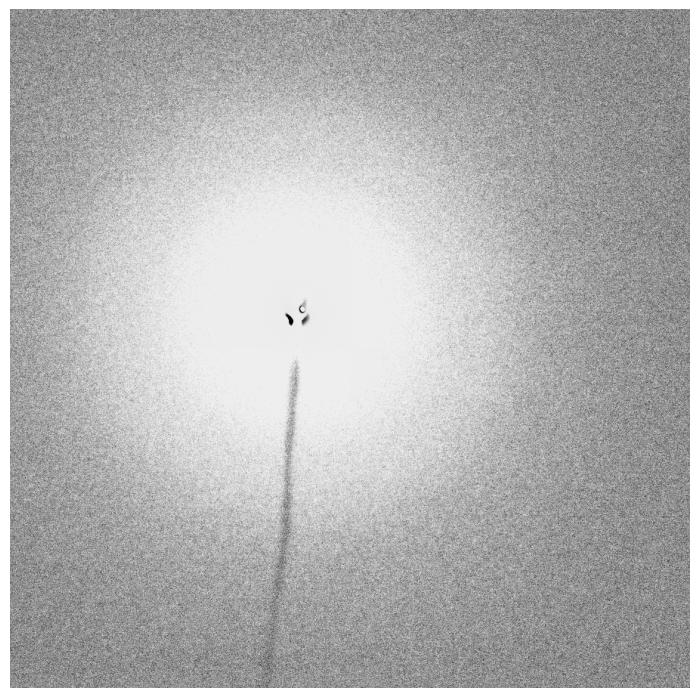

In [60]:
my_dpi = 96
plt.figure(figsize=(900/my_dpi, 900/my_dpi), dpi=my_dpi)
plt.imshow(final,cmap = 'gray')
plt.axis('off')
#plt.savefig('my_fig.png', dpi=my_dpi, pad_inches=False)
#plt.colorbar()
plt.imsave(fname = path_new,arr=final, cmap='gray', format='png')

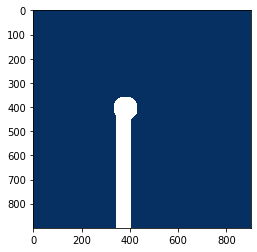

In [61]:
def circl(x,y, xcen = 396, ycen = 390):
    """
    This functionchecks if a point defined by its x,y cordinates are inside or outside a 
    defined circle with center at xcen, ycen and radius rr
    
    """
    rr = mt.sqrt((x-xcen)**2+(y-ycen)**2)
    if rr>=45:  #rr<=350 and
        return 1.0#True
    else:
        return float('nan')#0.0#False
    
def mask(img,xcen, ycen):
    """
    maask function applies the mask onto the image input
    
    """
    [x,y] = np.shape(img)
    mask = np.zeros([x,y])
    for i in range(x):
        for j in range(y):
            mask[i,j] = pointcheck(i,j)*circl(i,j, xcen, ycen)
    return mask

def pointcheck(xp,yp):
    """
    Point check creats a rectangle on top of the beam block manually and checks if the point is inside it or
    outside
    """
    x1,x2,x3,x4 = [400,400,0,0]
    y1,y2,y3,y4 = [345,400,400,345]
    d1 = (x1-x2)*(yp-y1)-(xp-x1)*(y2-y1)
    d2 = (x2-x3)*(yp-y2)-(xp-x2)*(y3-y2)
    d3 = (x4-x3)*(yp-y3)-(xp-x3)*(y4-y3)
    d4 = (x1-x4)*(yp-y4)-(xp-x4)*(y1-y4)
    if d1<=0 and d2<=0 and d3>=0 and d4>=0:
        return float('nan') #False
    else:
        return 1.0#True
    
def normalize_arr(arr):
    max_value = np.max(arr)
    min_value = np.min(arr)
    out = np.divide(np.subtract(arr,min_value),max_value-min_value)
    return out

xcen =405 ; ycen = 382
img = np.array(np.zeros([900,900]),dtype = 'uint8')
plt.imshow(mask(img, xcen, ycen), cmap = 'RdBu_r')

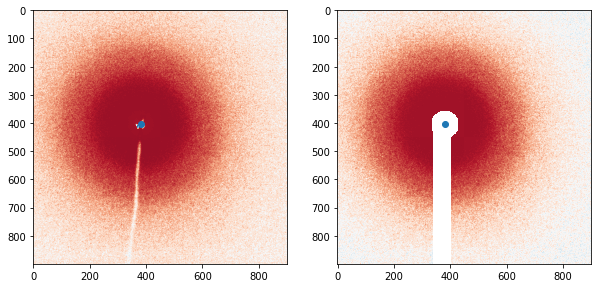

In [62]:
masked = np.multiply(final, mask(final, xcen, ycen))

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(final, cmap = 'RdBu_r')
plt.scatter(ycen, xcen)
#plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(masked, cmap = 'RdBu_r')
plt.scatter(ycen, xcen)
#plt.colorbar()

In [63]:
from diffraction_subfunctions import diffraction_to_azimuthal_avg

s_4us,I_tot = diffraction_to_azimuthal_avg(masked,ycen, xcen)

Electron beam wavelength = 5.3553082697833555e-12 m
Detector Detector	 Spline= None	 PixelSize= 4.800e-05, 4.800e-05 m
Wavelength= 5.355308e-12m
SampleDetDist= 5.000000e-01m	PONI= 1.944000e-02, 1.833600e-02m	rot1=0.000000  rot2= 0.000000  rot3= 0.000000 rad
DirectBeamDist= 500.000mm	Center: x=382.000, y=405.000 pix	Tilt=0.000 deg  tiltPlanRotation= 0.000 deg


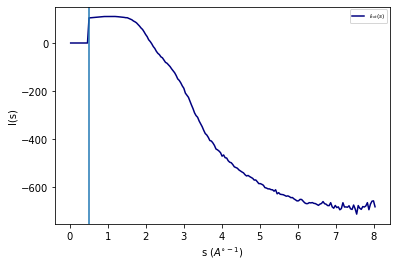

In [64]:
Itot_s2 = np.multiply(I_tot,(np.multiply(s_4us, s_4us)))
plt.plot(s_4us, I_tot, label = '$I_{tot}(s)$', color = 'navy')
#plt.plot(s_4us, Itot_s2, label = '$I_{tot}(s)$', color = 'brown')
plt.xlabel('s ($A^{\circ-1}$)')
plt.ylabel('I(s)')
plt.axvline(0.5)
plt.legend(fontsize = 'xx-small', loc=1)

In [65]:
def cut_array(sx,Itot):
    s_cut = []
    I_cut = []
    for s,I in zip(sx,Itot):
        if s>=1.0 and s<=8.0: #
            s_cut.append(s)
            I_cut.append(I)
        else:
            continue
    return s_cut, I_cut

#Background being subtracted after fitting the Itot to a cubic polynomial
from scipy.optimize import curve_fit

def fit_poly(x,a,b,c,d):
    x2 = np.multiply(x,x)
    x3 = np.multiply(x2,x)
    y = np.multiply(a, x3)+np.multiply(b, x2)+np.multiply(c,x)+d
    #y = a*x**3+b*x**2+c*x+d
    return y


[   3.2397407   -20.00236295 -175.52604862  398.92614532]


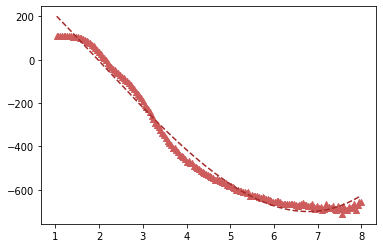

In [70]:
s_cut, I_cut = cut_array(s_4us, I_tot)

folder = r'\\win.desy.de\home\kayanatm\My Documents\GitHub\Electron-diffraction\Gas and Liquid_diffraction_files'
gas_file = 'Iatom_gly_simulated_kirk_gas_1D.txt'

import pandas as pd
df_gas = pd.read_csv(os.path.join(folder, gas_file), sep='\s+')
s_gas = df_gas['s'].to_numpy()
Iatom_gas = df_gas['Iatom'].to_numpy()
#Imol_gas = df_gas['Imol'].to_numpy()
_, I_atom_cut = cut_array(s_4us, Iatom_gas)

popt, pcov = curve_fit(fit_poly, s_cut, I_cut)

bg = fit_poly(s_cut, popt[0],  popt[1], popt[2], popt[3])

print(popt)
plt.scatter(s_cut, I_cut, marker = '^', color = 'indianred')
plt.plot(s_cut, bg, color = 'brown', ls = '--')

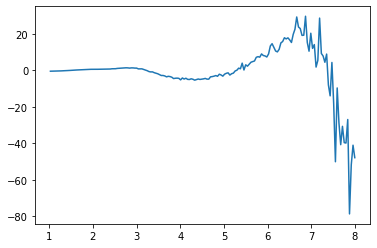

In [72]:
sMs = np.multiply(s_cut, np.divide(I_cut-bg, I_atom_cut))
plt.plot(s_cut, sMs)

Text(0, 0.5, 'g(r)')

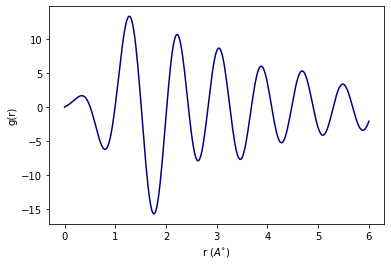

In [73]:
from diffraction_subfunctions import sms_to_mrdf

r, mrdf = sms_to_mrdf(s_cut, sMs)

plt.plot(r, mrdf,color = 'navy')

plt.xlabel('r ($A^{\circ}$)')
plt.ylabel('g(r)')
#plt.legend(fontsize = 'xx-small', loc=1)